In [50]:
# 导入必要的工具包
import pandas as pd
import numpy as np

#from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [51]:
# 读取训练数据和测试数据
train = pd.read_csv('./data/MNIST_train.csv')
test = pd.read_csv('./data/MNIST_test.csv')

y_train = train.label.values
X_train = train.drop("label",axis=1).values
X_test = test.values 

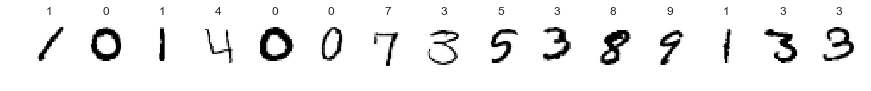

In [52]:
# 打印数据集的前15个训练图像
fig1, ax1 = pyplot.subplots(1,15, figsize=(15,10))
for i in range(15):
    ax1[i].imshow(X_train[i].reshape((28,28)))
    ax1[i].axis('off')
    ax1[i].set_title(y_train[i])

In [53]:
#将像素值[0,255]  --> [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#全体训练数据规模
print('the shape of train_image: {}'.format(X_train.shape))

the shape of train_image: (42000, 784)


In [ ]:
# PCA降维
pca = PCA(n_components=0.75)
pca.fit(X_train)

In [ ]:
# PCA的维数
pca.n_components_

In [ ]:
#对训练数据和测试数据进行降维
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
#降维后的数据规模
print(X_train_pca.shape)

In [ ]:
# 将训练集合拆分成训练集和校验集，在校验集上评估模型预测性能
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_pca, y_train, train_size = 0.8,random_state = 0)

In [ ]:
# 训练集和校验集规模
print(X_train_part.shape)
print(X_val.shape)

In [ ]:
# 训练一个多层感知机模型
clf_MLP = MLPClassifier(hidden_layer_sizes=(1000,), random_state=1)
clf_MLP.fit(X_train_part, y_train_part)

In [ ]:
# 在校验集上测试
from sklearn import  metrics
from sklearn.metrics import accuracy_score

#accuracy and confusion matrix
y_predict = clf_MLP.predict(X_val)

# 返回accuracy
val_accuracy = accuracy_score(y_val, y_predict)
print ("Validation Accuary: %.2f%%" % (val_accuracy * 100.0))

print("Classification report for classifier %s:\n%s\n"
      % (clf_MLP, metrics.classification_report(y_val, y_predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_val, y_predict))

In [ ]:
# 在测试集上生成测试提交结果
#accuracy and confusion matrix
y_predict = clf_MLP.predict(X_test_pca)

import pandas as pd
df = pd.DataFrame(y_predict)
df.columns=['Label']
df.index+=1
df.index.name = 'Imageid'
df.to_csv('SVC_Minist_submission.csv', header=True)

In [ ]:
# 这部分功能已经不好用了，因为校验集X_val的内容为PCA降维之后的信息，无法用图像显示
#如果想可视化，需要在校验集X_val中存储PCA降维之前的信息
# 生成比较列表，如果预测的结果正确，则对应位置为0，错误则为1
comp = [0 if y1 == y2 else 1 for y1, y2 in zip(y_val,y_predict )]

# 收集错误识别的样本下标
wrong_index = []
for i, value in enumerate(comp):
    if value: wrong_index.append(i)

#.drop("label",axis=1).value
# 输出错误识别的样本图像
pyplot.figure(figsize=(8, 6))
for plot_index , image_index in enumerate(wrong_index):
    image = X_val[image_index]
    if plot_index == 8:
        break
        
    pyplot.subplot(2, 4, plot_index+1)
    pyplot.axis('off')
    pyplot.imshow(image.reshape(28,28), cmap=pyplot.cm.gray_r,interpolation='nearest')
    # 图像说明，8->9 表示正确值为8，被错误地识别成了9
    info = "{right}->{wrong}".format(right=y_val[image_index], wrong=y_predict[image_index])
    pyplot.title(info, fontsize=16)

pyplot.show()